**Import Library**

Import semua library yang akan kita gunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Memanggil dan Membaca dataset

In [2]:
ponsel = pd.read_csv('mobile_price_train.csv')
ponsel.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

Mengecek Dimensi dari data yang kita punya

In [3]:
ponsel.shape

(2000, 21)

(2000, 21) adalah representasi dari dimensi dataset. Ini menyatakan bahwa dataset memiliki 1000 baris (atau sampel) dan 21 kolom (atau fitur).

Ini berarti bahwa untuk setiap baris, ada 21 atribut yang diamati dan dicatat dalam dataset. Ini membantu dalam mengukur dan menganalisis keterkaitan antara fitur dan membuat prediksi yang tepat. Namun tidak semua atribut akan kita gunakan.

**Data Preprocessing**

Setelah kita mengetahui dimensi dataset dan telah membaca dataset selanjutnya periksa info dari dataset untuk mengetahui informasi mengenai dataset seperti jumlah baris dan kolom, tipe data setiap kolom, jumlah data yang hilang (missing value) pada setiap kolom, hingga mengetahui penggunaan memori.

In [4]:
ponsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Berdasarkan atribut yang ditampilkan, beberapa atribut tampaknya tidak relevan dan sebaiknya dihapus untuk mempermudah proses analisis data.

In [5]:
del_col = ['m_dep', 'mobile_wt', 'talk_time', 'dual_sim', 'fc', 'sc_h', 'sc_w', 'three_g', 'touch_screen']
ponsel = ponsel.drop(del_col, axis = 1)
ponsel.head()

battery_power  blue  clock_speed  four_g  int_memory  n_cores  pc  \
0            842     0          2.2       0           7        2   2   
1           1021     1          0.5       1          53        3   6   
2            563     1          0.5       1          41        5   6   
3            615     1          2.5       0          10        6   9   
4           1821     1          1.2       1          44        2  14   

   px_height  px_width   ram  wifi  price_range  
0         20       756  2549     1            1  
1        905      1988  2631     0            2  
2       1263      1716  2603     0            2  
3       1216      1786  2769     0            2  
4       1208      1212  1411     0            1

In [6]:
ponsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   four_g         2000 non-null   int64  
 4   int_memory     2000 non-null   int64  
 5   n_cores        2000 non-null   int64  
 6   pc             2000 non-null   int64  
 7   px_height      2000 non-null   int64  
 8   px_width       2000 non-null   int64  
 9   ram            2000 non-null   int64  
 10  wifi           2000 non-null   int64  
 11  price_range    2000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 187.6 KB


Setelah melakukan penghapusan beberapa kolom yang dianggap tidak penting, sekarang kita sudah memiliki dataset yang lebih bersih dan efisien untuk digunakan dalam melakukan analisis atau prediksi. Dengan mempertahankan hanya kolom yang relevan dan memiliki pengaruh terhadap harga ponsel, hasil analisis atau prediksi akan lebih akurat dan terpercaya.

**Explanatory Data Analysis (EDA)**

fungsi describe() digunakan untuk melihat ringkasan statistik dari setiap kolom numerik dalam dataset. Ini termasuk menghitung mean, standar deviasi, persentil, minimum, maksimum, dan lainnya. Ini memberikan gambaran dasar tentang distribusi data dan membantu dalam identifikasi outlier atau nilai yang aneh dalam dataset.

In [7]:
ponsel.describe()

battery_power       blue  clock_speed       four_g   int_memory  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.521500    32.046500   
std       439.418206     0.5001     0.816004     0.499662    18.145715   
min       501.000000     0.0000     0.500000     0.000000     2.000000   
25%       851.750000     0.0000     0.700000     0.000000    16.000000   
50%      1226.000000     0.0000     1.500000     1.000000    32.000000   
75%      1615.250000     1.0000     2.200000     1.000000    48.000000   
max      1998.000000     1.0000     3.000000     1.000000    64.000000   

           n_cores           pc    px_height     px_width          ram  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      4.520500     9.916500   645.108000  1251.515500  2124.213000   
std       2.287837     6.064315   443.780811   432.199447  1084.732044   
min       1.000000     0.000000     0.000000   500.000000   256.000000   
25%       3.000000     5.000000   282.750000   874.750000  1207.500000   
50%       4.000000    10.000000   564.000000  1247.000000  2146.500000   
75%       7.000000    15.000000   947.250000  1633.000000  3064.500000   
max       8.000000    20.000000  1960.000000  1998.000000  3998.000000   

              wifi  price_range  
count  2000.000000  2000.000000  
mean      0.507000     1.500000  
std       0.500076     1.118314  
min       0.000000     0.000000  
25%       0.000000     0.750000  
50%       1.000000     1.500000  
75%       1.000000     2.250000  
max       1.000000     3.000000

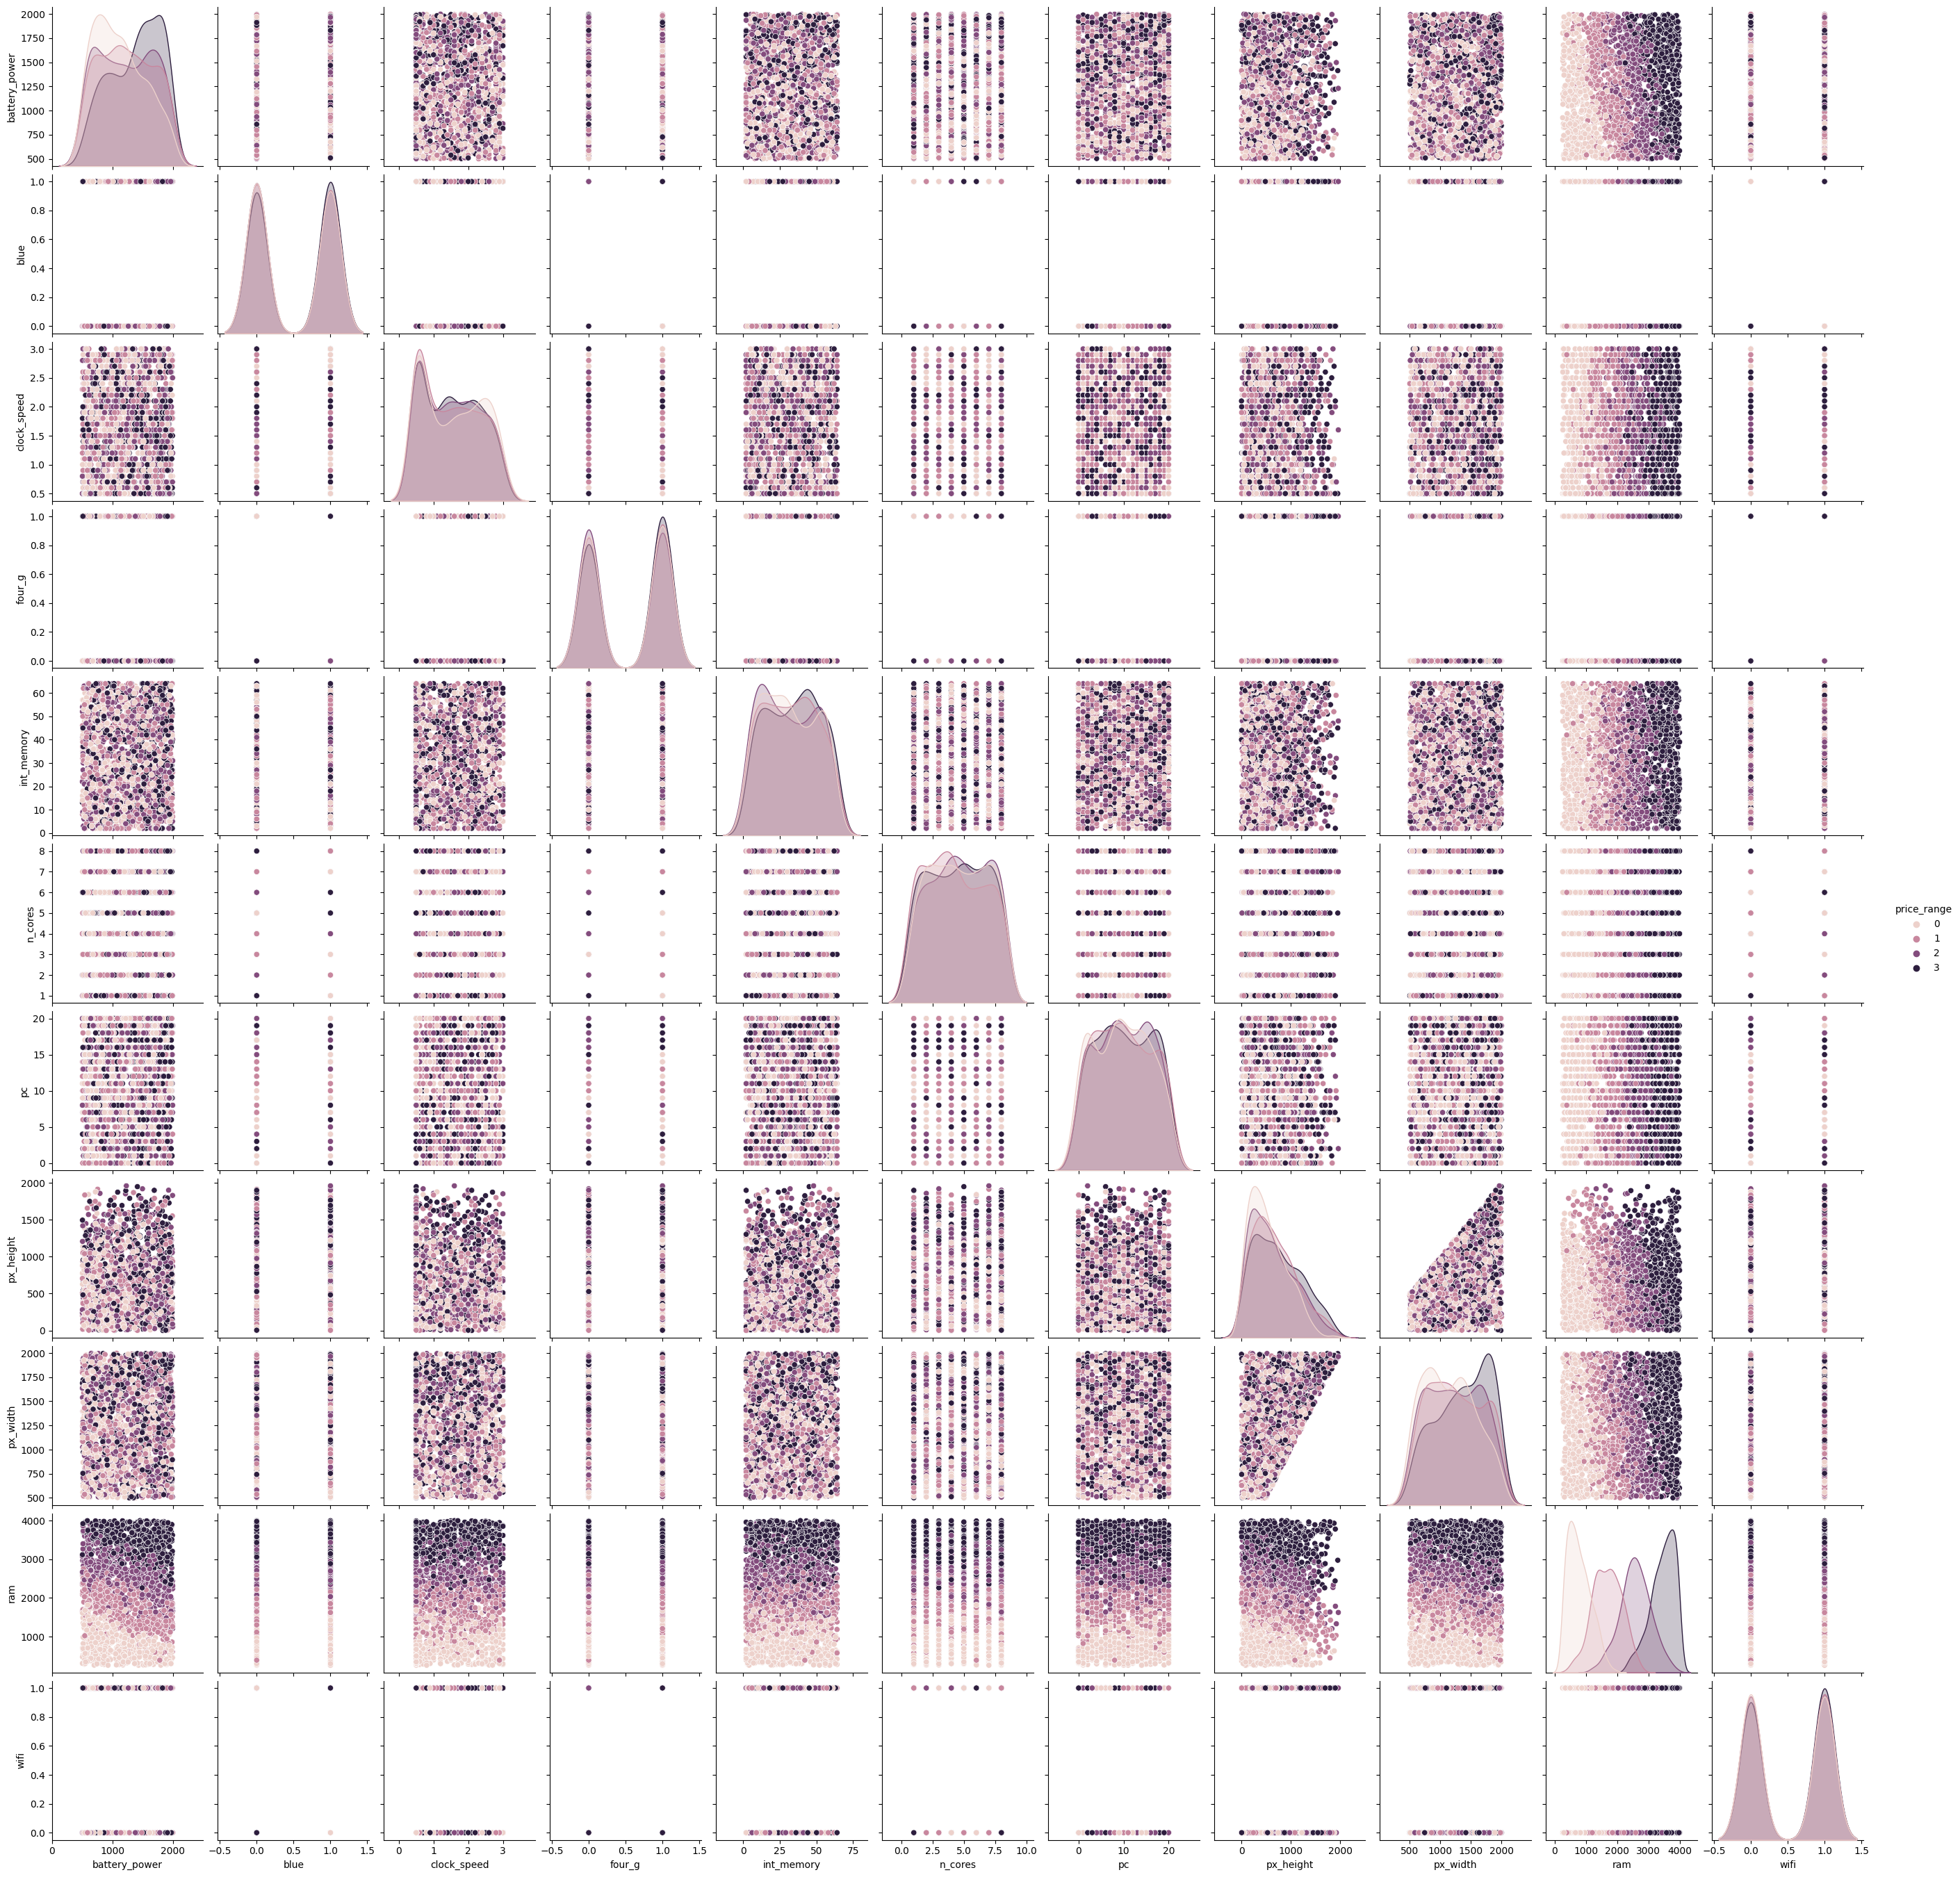

In [8]:
sns.pairplot(ponsel, hue = "price_range")

**Data Visualization and Analysis**

*RAM VS PRICE*

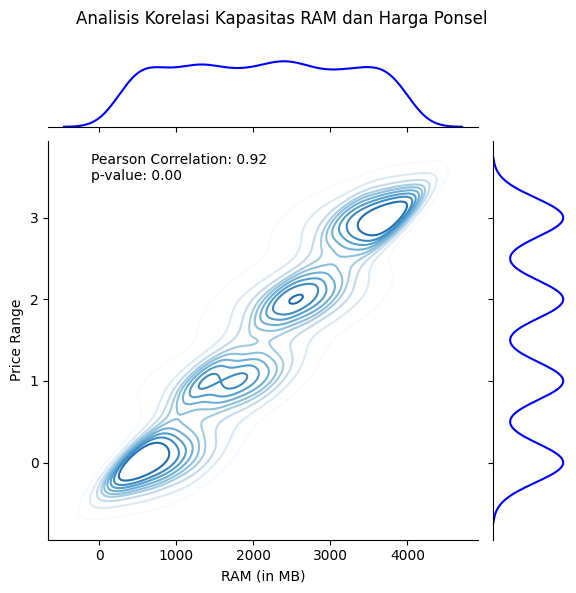

In [9]:
#fig, ax = plt.subplots(figsize=(12, 8))
x = ponsel["ram"]
y = ponsel["price_range"]

corr, p = pearsonr(x, y)
g = sns.jointplot(x='ram',y='price_range',data=ponsel,color='blue',kind='kde', cmap = "Blues")

g.ax_joint.text(0.1, 0.9, f"Pearson Correlation: {corr:.2f}\np-value: {p:.2f}", transform=g.ax_joint.transAxes)
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("Analisis Korelasi Kapasitas RAM dan Harga Ponsel")

plt.xlabel('RAM (in MB)')
plt.ylabel('Price Range')
plt.show()

Jointplot tipe kde adalah salah satu cara untuk menampilkan hubungan antara 2 variabel pada suatu data. Dalam hal ini, jointplot tipe kde akan menampilkan scatter plot dan kernel density plot dari 2 variabel, yaitu RAM dan harga ponsel.

Warna pada jointplot tipe kde menunjukkan tingkat intensitas hubungan antara 2 variabel. Semakin gelap warna, semakin tinggi tingkat korelasi antara 2 variabel. Artinya, warna yang lebih gelap menunjukkan bahwa ada lebih banyak data yang memiliki hubungan yang kuat antara RAM dan harga ponsel.

Nilai Pearson Correlation sebesar 0.92 menunjukkan bahwa ada hubungan positif yang kuat antara RAM dan harga ponsel. Semakin mendekati 1, semakin kuat hubungan positif antara 2 variabel. Nilai p-value sebesar 0.00 menunjukkan bahwa hubungan antara RAM dan harga ponsel tidak terjadi secara acak, atau ada hubungan yang signifikan antara kedua variabel tersebut.

*Internal Memory vs Price*

0.04443495938898741
0.04693006243437825


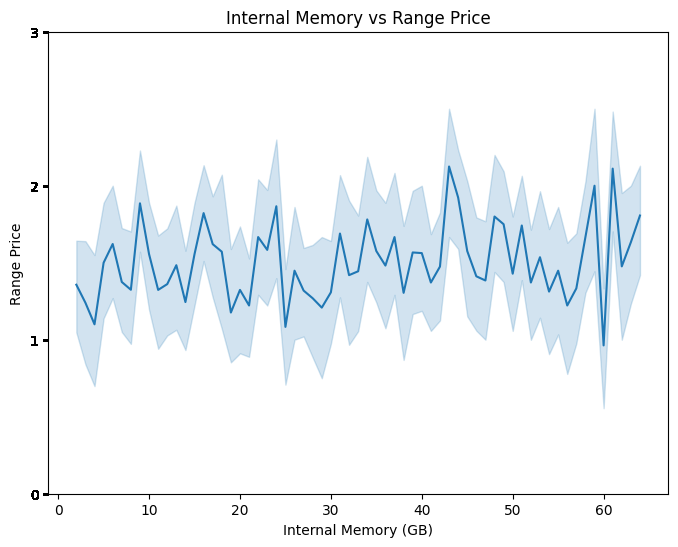

In [10]:
x = ponsel["int_memory"]
y = ponsel["price_range"]

corr, p = pearsonr(x, y)
print(corr)
print(p)

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x='int_memory', y='price_range', data=ponsel)
ax.set_ylim(bottom=0)
ax.set_yticks(ponsel['price_range'])
plt.title("Internal Memory vs Range Price")
plt.xlabel("Internal Memory (GB)")
plt.ylabel("Range Price")
plt.show()

*% Konektivitas*

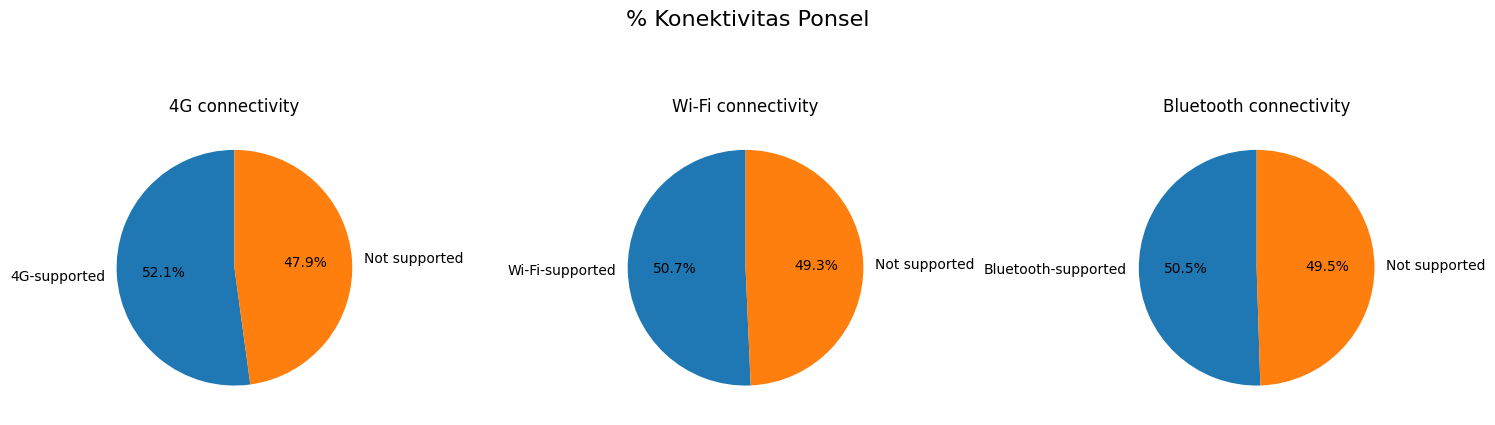

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("% Konektivitas Ponsel", fontsize=16)

labels_four_g = ["4G-supported",'Not supported']
values_four_g = ponsel['four_g'].value_counts().values
ax[0].pie(values_four_g, labels=labels_four_g, autopct='%1.1f%%', startangle=90)
ax[0].set_title("4G connectivity")

labels_wifi = ["Wi-Fi-supported",'Not supported']
values_wifi = ponsel['wifi'].value_counts().values
ax[1].pie(values_wifi, labels=labels_wifi, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Wi-Fi connectivity")

labels_blue = ["Bluetooth-supported",'Not supported']
values_blue = ponsel['blue'].value_counts().values
ax[2].pie(values_blue, labels=labels_blue, autopct='%1.1f%%', startangle=90)
ax[2].set_title("Bluetooth connectivity")

plt.tight_layout()
plt.show()


*Battery Power vs Range Price*

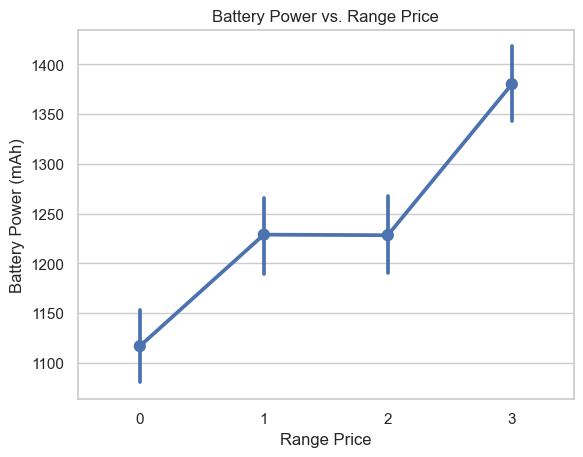

In [12]:
sns.set(style="whitegrid")

sns.pointplot(y="battery_power", x="price_range", data=ponsel)

plt.title("Battery Power vs. Range Price")
plt.ylabel("Battery Power (mAh)")
plt.xlabel("Range Price")

plt.show()

*Clock Speed vs Price Range*

-0.006605690881732078
0.7678151230107574


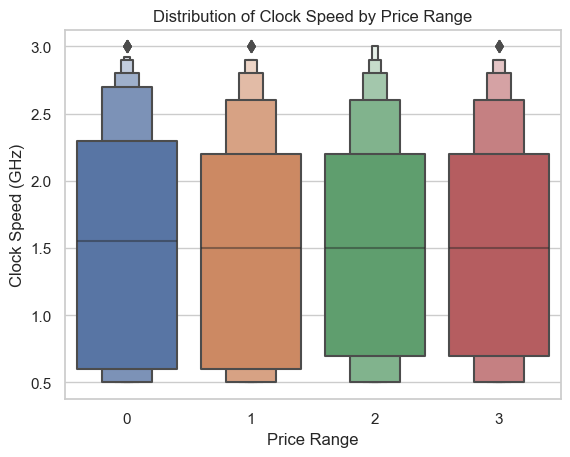

In [13]:
y = ponsel["clock_speed"]
x = ponsel["price_range"]

corr, p = pearsonr(y, x)
print(corr)
print(p)

sns.boxenplot(x="price_range", y="clock_speed", data=ponsel)
plt.xlabel("Price Range")
plt.ylabel("Clock Speed (GHz)")
plt.title("Distribution of Clock Speed by Price Range")
plt.show()


*px height vs px width*

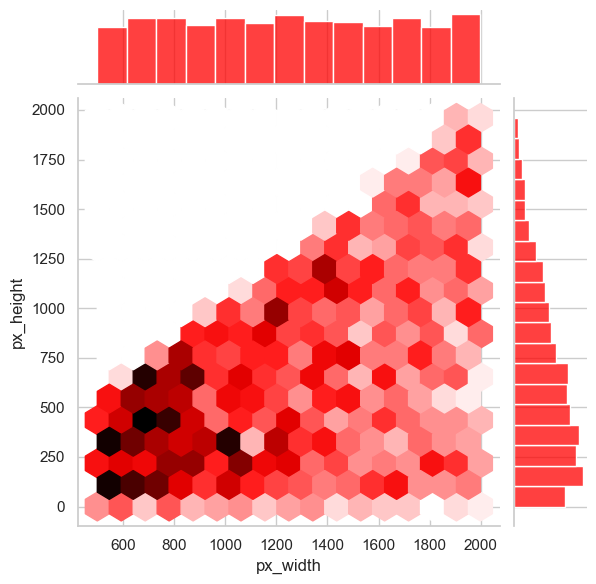

In [14]:
sns.jointplot(data=ponsel, y="px_height", x="px_width", kind = 'hex', color = "red")

plt.xlabel("px_width")
plt.ylabel("px_height")

plt.show()

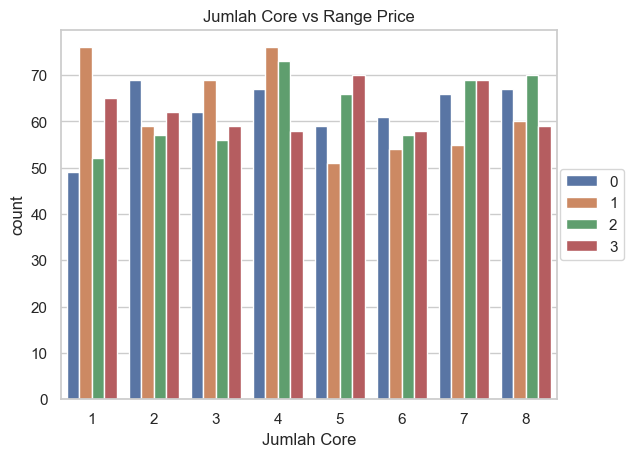

In [15]:
sns.countplot(x='n_cores', hue = "price_range", data=ponsel)
plt.title("Jumlah Core vs Range Price")
plt.xlabel("Jumlah Core")
plt.legend(loc = "center right", bbox_to_anchor = (1.15, 0.5))
plt.show()

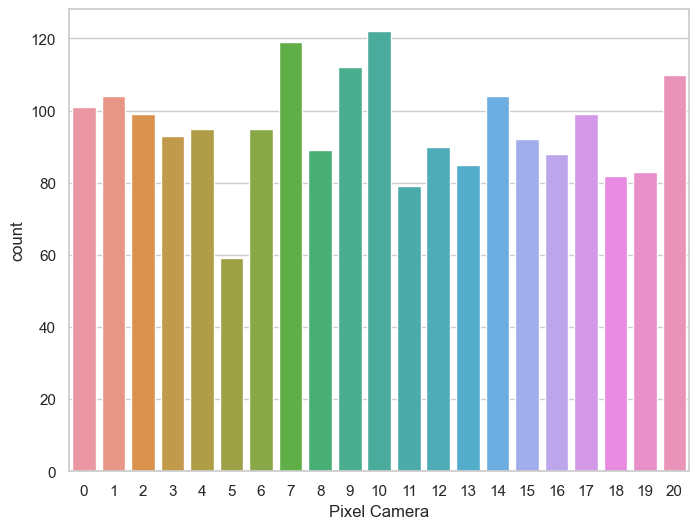

In [19]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.countplot(x='pc', data=ponsel)
#plt.title("Pixel Camera")
plt.xlabel("Pixel Camera")
plt.show()